In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (7.5,5)

# Lab 3

## Problem 1

### A) Goal: Identify bad data and throw it out.

#### 1. Explore the data with appropriate plots.

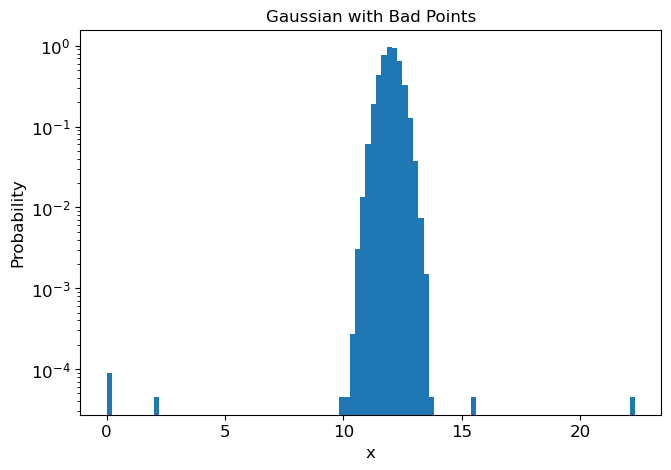

In [2]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 'large')
plt.yscale('log')
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.title(f'Gaussian with Bad Points', fontsize='large')
plt.xlabel('x',fontsize='large')
plt.ylabel('Probability',fontsize='large')
plt.show()

#### 2. State the statistical question in words.

Given a threshold value at some $X\sigma$, what is the ratio of bad data and good data being thrown out? 

#### 3. Restate the question in math. Clearly.

If the distance from the center (x = 12) of our prescribed Gaussian exceeds our chosen $X\sigma$ value, we remove it from our dataset. We find the false positives and false negatives, and find our accuracy with a truth table.

#### 4. Apply your statistical test and construct a truth table.

Here, let's choose a threshold value of $4\sigma$. Because it's modeled after a Gaussian with a spread of 0.4, $4\sigma$ = 1.6.

In [3]:
print(d)
type(d)

[11.43115383 11.42394908 12.19912042 ... 15.6        22.3
 12.7       ]


numpy.ndarray

In [13]:
myGTT = 0
myBTT = 0
myGBT = 0
myBBT = 0
bad_points = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
threshold = 1.6

for i in range(len(d)):
    if (abs(12.-d[i]) >= threshold):
        if d[i] in bad_points[:]:
            myBBT += 1
        else:
            myBTT += 1
    else:
        if d[i] in bad_points[:]:
            myGBT += 1
        else:
            myGTT += 1

print('True Positives = ' + str(myGTT))
print('False Negatives = ' + str(myGBT))
print('False Positives = ' + str(myBTT))
print('True Negatives = ' + str(myBBT))


True Positives = 99995
False Negatives = 1
False Positives = 5
True Negatives = 7


|             | True T   | Bad T |
| ----------- | ----------- | ----------- |
| My Test Good     | 99995      |  5       |
| My Test Bad   | 1        |  7       |

### B) 

The number of omissions has an inverse correlation with the magnitude of our threshold. The larger our threshold, the less data that is thrown out. It is a predictable quantity, especially considering we know that our data is sampled from a Gaussian whose parameters are known, so we can estimate the amount of data within each threshold relative to the number of samples.

We can calculate the expected number of data points thrown out by taking the percentage of data outside of our Gaussian from the sigma threshold chosen, multiplied by the total number of data points in our dataset. 

### C)

There are mistakes of commission (bad data getting in). They aren't necessarily avoidable without throwing out good data. Consider the cases where the original, proper data is further from the center than our proposed "bad" data. Then we must get rid of this "good" data before getting rid of our planted data.

Such mistakes of commission depend on, again, the magnitude of our threshold. If we wanted to minimize these mistakes, we would want a very small threshold. This gets rid of more data, and likely a lot of good data, but makes it much more likely we get rid of improper data.

At the end of the day, it is the choice of the data scientist to determine if mistakes of commission is an important value to minimize.

## Problem 2

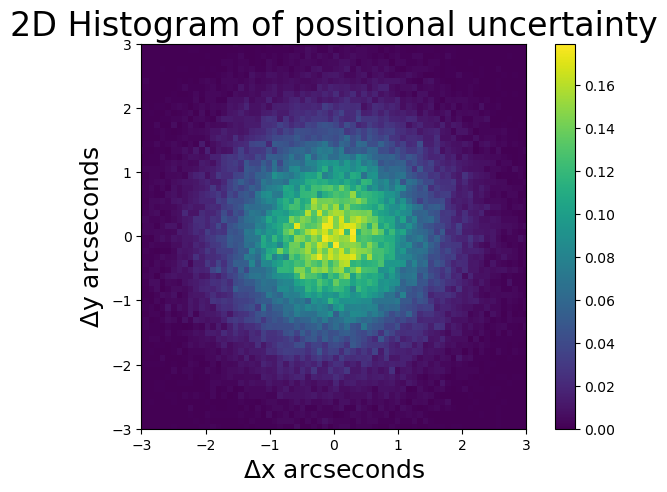

In [5]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

### 1) What is the question in words?

What must the distance be, in arcseconds, in order to have a '5 sigma' detection in movement? In other words, when has the movement of our signal reached a sufficient threshold for it to be significant, rather than be uncertainly produced by a background signal of our candidate or greater?

### 2) What is the question in math?

Given a 2D gaussian, which can be composed of two separate, identical 1D Gaussians, we can represent this as a Rayleigh distribution, as it is the square root of the sum of two Gaussians. This makes sense, as the Rayleigh will measure the magnitude, or our desired distance. And the domain of distance between points are restricted from 0 to infinity.

__At what value of arcseconds of our Rayleigh distribution will the integral from given value to pos. infinity will be equal to the equivalent integral of the probability density 5 sigma value of a Gaussian?__

### 3) What distance in arcseconds represents a 5 sigma detection of motion?

Here let us plot the analytic pdf of our distribution. After reading the wikipedia page, we can determine that the parameter of our Rayleigh distribution, $\sigma$ = 1.0 arcseconds, the same as described for the 2D Gaussian in the problem statement.

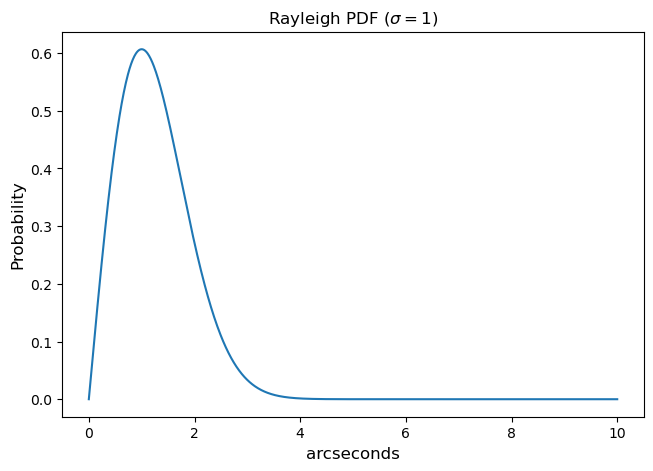

In [6]:
x = np.linspace(0, 10, 1000)
originalDist = stats.rayleigh.pdf(x, scale = 1)

plt.rcParams["figure.figsize"] = (7.5, 5)
plt.title(f'Rayleigh PDF ($\sigma = 1$)', fontsize='large')
plt.xlabel('arcseconds',fontsize='large')
plt.ylabel('Probability',fontsize='large')
plt.plot(x, originalDist)

We already know the corresponding probability of 5-sigma with a standard normal distribution. This is the answer to our integral.

In [7]:
prob5Sigma = 1/3.5e6 # this is with respect to a standard normal distribution
leftIntegral = 1 - prob5Sigma
print(leftIntegral)

0.9999997142857143


All we need to do now is use the percent point function to take the inverse of the probability and get the value required for a 5-sigma measurement.

In [8]:
stats.rayleigh.ppf(leftIntegral)

5.489676406965609

A 5-sigma value for our distribution is roughly 5.49 arcseconds!

## Problem 3

### 1) What is the question in words?

Given our candidate measurement of 6800 rays observed over 15 days, how confident can we be in saying the background provided a signal as signal-like or more than our candidate (in other words, are we confident it is the moon shadow rather than average noise)?

### 2) Translate the question to math, describing both the expected background pdf() and the integral you need to do.

Given the problem statement, we are given 1 cosmic ray per time interval of one minute, measuring over 15 days, 8 hours per day (this is a total of 7200 minutes). We can choose to demonstrate this with a Poisson distribution, with an expected value of $\lambda = 1$ as the parameter, then convolving it with itself 7200 times.

However, as we discovered in lab 2, we simply need to multiply lambda * the number of times convolved (in other words, the total time span divided by the time interval defined with the original Poisson) to define the parameter for a new Poisson distribution, which will represent all of these convolutions at once.

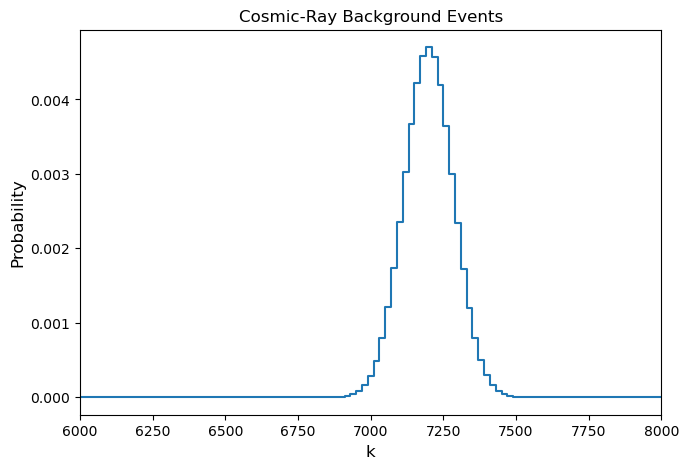

In [9]:
newLambda = 1 * 7200
k = np.linspace(0, 10000, 501)

oneDay = stats.poisson.pmf(k, newLambda)

plt.rcParams["figure.figsize"] = (7.5,5)
plt.xlim(6000,8000)
plt.title(f'Cosmic-Ray Background Events', fontsize='large')
plt.xlabel('k',fontsize='large')
plt.ylabel('Probability',fontsize='large')
plt.step(k, oneDay, where = 'mid')

Notice how our candidate of 6800 is below the expected value of 7200. This is the opposite of what we're used to, where we are on the right of the expected value. We must now integrate from negative infinity to our candidate, rather than from our candidate to positive infinity.

### 3) Convert to sigma.

This will be easy. We can calculate the probability without having to subtract from 1 (or using the survival function). Then we can plug in that value into the percent point function.

In [10]:
probability = stats.poisson.cdf(k = 6800, mu = 7200)

In [11]:
stats.norm.ppf(probability)

-4.750747965777188

We ended up getting a sigma value of -4.75. This should be somewhat expected, given the context of the problem. Since the moon blocks cosmic rays, we should begin to suspect that this big drop in values could be due to background interference. This has been different from all other problems regarding significance we have done so far.

Unfortunately, this does not yet reach the significance value of 5-sigma (in magnitude). So by the standards of the scientific community, this is not yet conclusive.